### Los datos son baratos pero el conocimiento es más difícil de conseguir

## Estadística Descriptiva

Empezar a entender mis datos.

### Media

Si se tiene una muestra de $n$ valores: $x_i$ 
La media $\mu$ es la suma de los valores dividido por el número de valores

$$ \mu = \frac{1}{n} \sum_{i}^{n} x_i $$

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
media_edad = np.mean(data['Age'])
media_edad

29.69911764705882

La media se encarga de describir la tendencia central de nuestros datos.
¡Importante!, esta media $\mu$ se usa para describir a una población completa.

### Varianza

Otro valor estadístico que nos ayuda a entender nuestros datos es la Varianza. A diferencia de la media que describe la tendencia de en donde se centran nuestros datos, la varianza describe que tan lejos se encuentran los datos de la media.

$$ \sigma^2 = \frac{1}{n} \sum_{i}^{n} (x_i - \mu)^2 $$

In [2]:
varianza_edad = np.var(data['Age'])
varianza_edad

210.7235797536662

¿Años al cuadrado?
La varianza es difícil de interpretar debido a las unidades.

Por suerte la desviación estándar es un estadístico más significativo.

### Desviación estándar

$$ \sigma =  \sqrt{\sigma}  $$

In [3]:
desviacion_edad = np.std(data['Age'])
desviacion_edad

14.516321150817317

¡Importante!, estas formulas para $\sigma^2$ y $\sigma$ se usan para describir a una población completa.

Si lidiamos con una muestra de N valores se usan estimadores, $\bar{x}$ y $S^2$

$$ \bar{x} = \frac{1}{N} \sum_{i}^{N} x_i $$

$$ S^2 = \frac{1}{N-1} \sum_{i}^{N} (x_i - \bar{x})^2 $$

## Distribuciones

La media, la varianza y la desviación estándar son estadísticos concisos, pero también peligrosos, ya que nublan la información que nos proporcionan los datos.

Un apoyo para entenderlos mejor es ver la distribución de los datos.

La representación más común de una distribución es un histograma, que describe frecuencia con la que aparece cada valor.

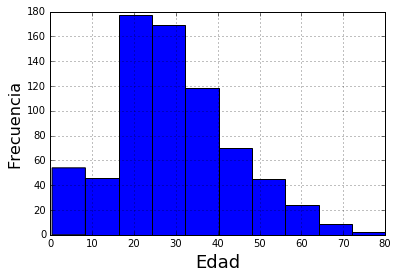

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

edades = data[data.Age.notnull()]['Age']
edades.hist()
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

In [5]:
len(edades.unique())

88

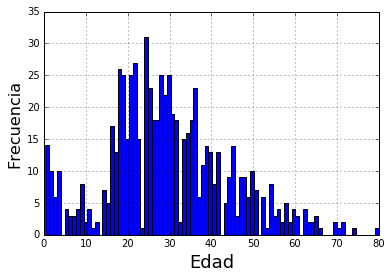

In [6]:
edades = data[data.Age.notnull()]['Age']
edades.hist(bins=88)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

Los histogramas son útiles porque podemos revisar las siguientes características rápidamente:

- Moda: El valor más común o que más se repite en una distribución se llama moda.

- Forma: Alrededor de la moda podemos ver que la distribución es asimétrica.

- Los valores atípicos. (outliers)

### Función de probabilidad

Si queremos transformar las frecuencias a una función de probabilidad debemos dividir la serie entre el número de elementos

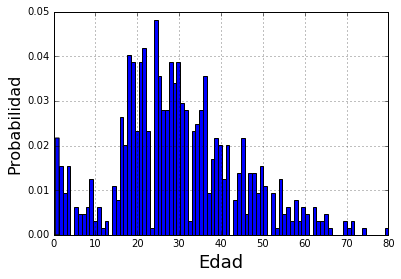

In [7]:
edades.hist(bins=88, normed=True)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Probabilidad', fontsize=16)

$$ P(X = x) = f(x) $$

La función de probabilidad funciona bien si el número de valores es pequeño.

Pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace más pequeño.

Una alternativa es usar la función de distribución acumulada.

In [8]:
edades.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Función de distribución acumulada

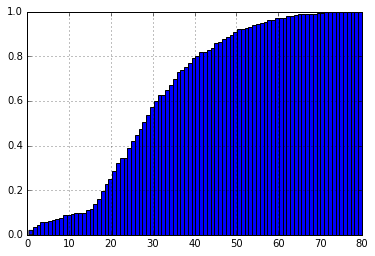

In [9]:
edades.hist(cumulative=True, bins=88, normed=True)

$$ P(X \leq x) = f(x) $$

### Distribuciones continuas

Cuando tenemos variables aleatorias continuas

La distribución normal (Gaussiana), es una de las distribuciones de probabilidad que con más frecuencia aparece aproximada en fenómenos reales.

$$ P(x, \sigma, \mu) = \frac{1}{\sigma\sqrt{2 \pi}}e^{-(x -\mu)^2/2\sigma^2}$$

(array([ 0.00397687,  0.00132562,  0.00132562,  0.00265125,  0.00662812,
         0.00265125,  0.00265125,  0.01855872,  0.01855872,  0.02651246,
         0.03314058,  0.05302493,  0.08351426,  0.08483988,  0.1431673 ,
         0.1259342 ,  0.18558724,  0.19884348,  0.2571709 ,  0.27307837,
         0.31417269,  0.37250011,  0.41492005,  0.38177947,  0.42022255,
         0.44938626,  0.3261033 ,  0.38443072,  0.33670829,  0.32080081,
         0.2916371 ,  0.2346353 ,  0.17498226,  0.14051606,  0.15774916,
         0.10604985,  0.08616551,  0.05832742,  0.04109432,  0.02916371,
         0.01988435,  0.01988435,  0.00397687,  0.00795374,  0.00530249,
         0.00265125,  0.00132562,  0.00132562,  0.        ,  0.00132562]),
 array([-3.73494616, -3.58407372, -3.43320129, -3.28232885, -3.13145641,
        -2.98058397, -2.82971153, -2.6788391 , -2.52796666, -2.37709422,
        -2.22622178, -2.07534934, -1.92447691, -1.77360447, -1.62273203,
        -1.47185959, -1.32098715, -1.17011472, -1

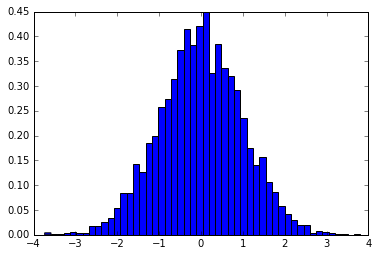

In [10]:
import numpy as np
x = np.random.randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/2000px-Standard_deviation_diagram.svg.png">

### ¿Por qué usar distribuciones continuas?

Como todos los modelos, las distribuciones continuas son abstracciones, lo que significa que pueden simplificar y deshacerse de los detalles que se consideran irrelevantes (Errores de medición, outliers).

Además son una forma de comprimir los datos. Ya que si logramos ajustar un modelo a un conjunto de datos, un pequeño conjunto de parámetros puede resumir una gran cantidad de datos.

### ¿Por qué es tan importante la distribución Normal?

El teorema de límite central establece que la media de la muestra $\bar{X}$ sigue una distribución normal (para $n$ grandes)
con media $\mu$ y desviación estándar $\frac{\sigma}{\sqrt(n)}$

El teorema del límite central explica, porque aparece con tanta frecuencia la distribución normal en el mundo natural.

La mayoría de las características de los animales y otras formas de vida se ven afectadas por un gran número de variables genéticas y ambientales cuyo efecto es aditivo.

Las características que medimos son la suma de un gran número de pequeños efectos, por lo que su distribución tiende a ser normal.

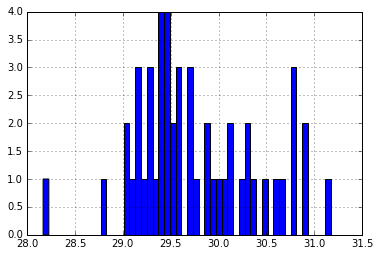

In [35]:
#Prueba para el Teorema de Limite Central usando 50
media_muestra = [] #Iniciamos una lista

for x in range(0, 50):
    media_muestra.append(np.mean(edades.sample(n=300))) 

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins=50)

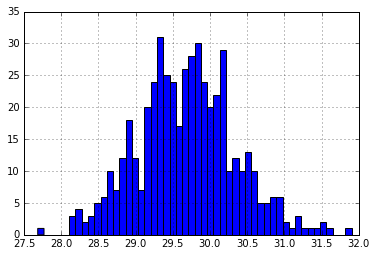

In [37]:
#Prueba para el Teorema de Limite Central usando 500
media_muestra = []

for x in range(0, 500):
    media_muestra.append(np.mean(edades.sample(n=300)))

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins = 50)

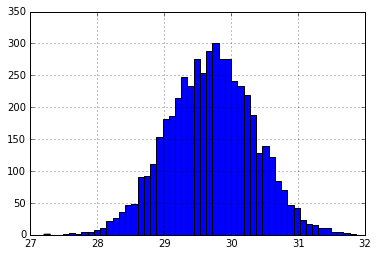

In [38]:
#Prueba para el Teorema de Limite Central usando 5000
media_muestra = []

for x in range(0, 5000):
    media_muestra.append(np.mean(edades.sample(n=300)))

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins = 50)

### Probabilidad

Anteriormente mencionamos que la probabilidad es la frecuencia expresada como una fracción tamaño de muestra.

Esa es una definición de probabilidad, pero no es la única y de hecho, el significado de probabilidad es un tema controversial.

Existe un consenso general de que la probabilidad es un valor real entre 0 y 1. Este valor pretende dar una medida cuantitativa que corresponde a la noción de que algunas cosas son más probables que otras.

$$ P(E) \epsilon [0,1] $$

### Reglas de probabilidad (Recordando a Kolmogorov)

- La probabilidad de que ocurra un evento es un valor entre 0 y 1. Para todo evento existe una probabilidad
$$ 0 \leq P(E) \leq 1 $$
- La probabilidad de que nada ocurra es 0
$$ P(\emptyset) = 0 $$
- La probabilidad de que algo ocurra es 1
$$ P(\Omega) = 1 $$
- La probabilidad de algo es 1 menos la probabilidad de lo contrario

<img src="conditional_risk.png">

### Probabilidad condicional

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

Si A y B son eventos independientes entonces:

$$ P(A | B) = \frac{P(A) P(B)}{P(B)}  = P(A) $$

##### Monty Hall

https://www.youtube.com/watch?v=mhlc7peGlGg

### Regla de Bayes

El teorema de Bayes es a menudo interpretado como una declaración acerca de cómo la evidencia, E, afecta la probabilidad de una hipótesis, H:

$$P(H | E) = P(H) \frac{P(E|H)}{P(E)}$$

En palabras, esta ecuación dice que la probabilidad de H después de haber visto E es el producto de $P(H)$, que es la probabilidad de que H antes de ver la evidencia E, y la relación de $P(E|H)$, la probabilidad de ver la evidencia suponiendo que H es verdadera, y $P(E)$, la probabilidad de ver la evidencia bajo cualquier circunstancia.

Ejemplo: Filtro de Spam

$$ P(S|W) = \frac{P(W|S) \cdot P(S)}{P(W|S) \cdot P(S) + P(W|H) \cdot P(H)} $$

donde:

- $P(S|W)$ Es la probabilidad de que nuestro mensaje sea SPAM, sabiendo que encontramos la palabra "Dinero"
- $P(S)$ Es la probabilidad de que cualquier mensaje sea SPAM
- $P(W|S)$ La probabilidad de que nuestra palabra aparezca en mensajes de SPAM
- $P(H)$ La probabilidad de que nuestro mensaje sea HAM
- $P(W|H)$ La probabilidad de que la nuestra palabra aparezca en HAM
